#**Dispersión de Thomson en el Sol**

Cuando una onda electromagnética incide en un electrón, produce una vibración en dicho electrón que da lugar a una segunda onda con la misma frecuencia, y por tanto, con la misma energía, en otra dirección. Dicha onda, tendrá sin embargo una menor intensidad.

Deben cumplirse **dos condiciones** para que tenga lugar la dispersión de Thomson:

1.   La **longitud de coherencia** de la radiación es pequeña en comparación con la separación entre las partículas.
2.   La **energía de los fotones** es despreciable en comparación con la energía de la masa del resto de partículas.

*T.A. Howard, S.J. Tappin (Interplanetary Coronal Mass Ejections Observed in the Heliosphere: 1. Review of Theory, 27 May 2009)*

Sección eficaz para un electrón: **7.95E-30 m²sr-¹**


***Dispersión de Thomson en la corona solar***: podemos observar el fenómeno de la dispersión de Thomson en la corona del Sol, donde los fotones emitidos desde la fotosfera interaccionan con los electrones libres del plasma de la corona.
En particular, se puede utilizar la información que nos da este fenómeno para estudiar la masa de las eyecciones de masa coronal, EMCs (en inglés, *Coronal Mass Ejections, CMEs*).

##**1. Geometría y fenómeno de la dispersión de Thomson**

### 1.1. Definición de **constantes** y **parámetros iniciales**

Importación de librerías y definición de constantes para la realización de los cálculos:

#### Constantes y parámetros iniciales

In [2]:
from math import *
from matplotlib import pyplot
import numpy as np
import thomsonpy.thomson_scattering.thomson_scattering_tools as thtools
from thomsonpy.thomson_scattering.thomson_scattering_tools import ThomsonGeometry as thgeom
import thomsonpy.config.thomson_scattering_params as tsp
import thomsonpy.constants.universal_constants as uc
import thomsonpy.constants.units as units
import thomsonpy.ne.ne_models as ne

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# Parámetros
I0 = thtools.radiacion_planck(tsp.T_SOL, tsp.WAVELENGTH) # intensidad de la fuente (el Sol)
U = thtools.coef_limb_darkening(tsp.WAVELENGTH) # coeficiente de limb - darkening.

In [4]:
# Constantes
RSOL = thtools.RSOL

####**Ley de Planck:** radiación de cuerpo negro

En función de la **frecuencia**, $\nu$:
$$I_\nu = \frac{2 h \nu^3}{c^2}\frac{1}{e^{\frac{h \nu}{k T}}-1}$$

En función de la **longitud de onda**, $\lambda$:
$$I_\lambda = \frac{2 h c^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k T}} - 1}$$
Donde:


* $h = 6.62607015·10^{-34} J·s$ es la constante de Planck.  
* $\nu $ es la frecuencia de la longitud de onda.
* $k = 1.38·10^{-23}J·K^{-1}$ es la constante de Boltzmann.
* $c = 3·10^8m·s^{-1}$ es la velocidad de la luz.
* $T = 5778 K$ es la temperatura (en este caso del Sol).



Longitud de onda inicial =  5.e-08
Longitud de onda final =  2.e-06
Paso de longitud de onda =  1.95e-09


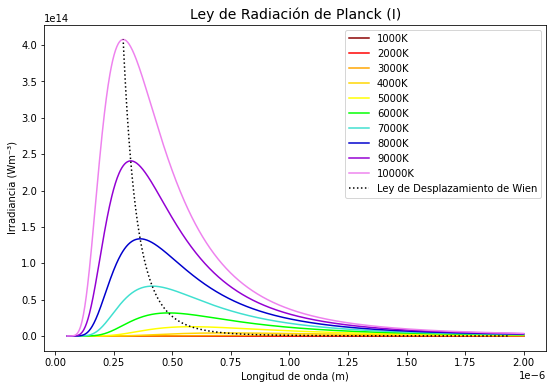

Frecuencia inicial 6.e+15
Frecuencia final =  1.5e+14
Paso para la frecuencia =  5.85e+12


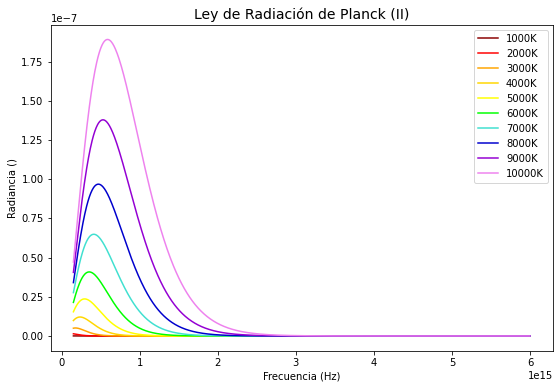

In [5]:
# Valores para la temperatura efectiva del cuerpo negro (K).
temperaturas_planck = range(1000, 11000, 1000)
# Configuración para la visualización de los gráficos: colores de líneas y 
# etiquetas para la leyenda.
colores_planck = ['darkred', 'red', 'orange', 'gold', 'yellow', 'lime', 'turquoise', 'mediumblue', 'darkviolet', 'violet']
etiquetas_planck = [str(i) + "K" for i in temperaturas_planck]

# Gráfico de la ley de radiación de Planck en función de la longitud de onda.

pyplot.figure(figsize=(9, 6))
pyplot.title("Ley de Radiación de Planck (I)", fontsize=14)
pyplot.xlabel("Longitud de onda (m)")
pyplot.ylabel("Irradiancia (Wm⁻³)")

ini_long_onda = 500E-10 # m
print("Longitud de onda inicial = ", np.format_float_scientific(ini_long_onda))

long_onda = 20000E-10 # m 
print("Longitud de onda final = ", np.format_float_scientific(long_onda))

incr_long_onda = abs(long_onda - ini_long_onda) / 1E3 #10E-10# Ángstroms
print("Paso de longitud de onda = ", np.format_float_scientific(incr_long_onda))

valores_long_onda = np.arange(ini_long_onda, long_onda + incr_long_onda, incr_long_onda)

for i in range(len(temperaturas_planck)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valores_radiancia = [thtools.radiacion_planck(temperaturas_planck[i], j) for j in valores_long_onda]
  # Representa los valores de omega.
  pyplot.plot(valores_long_onda, valores_radiancia, linestyle = '-', color = colores_planck[i], label = etiquetas_planck[i])

# Añadimos Ley de Desplazamiento de Wien
temperaturas_wien = range(1500, 10001)
valores_long_onda_wien = [thtools.ley_wien(i) for i in temperaturas_wien]
valores_wien = [thtools.radiacion_planck(i, thtools.ley_wien(i)) for i in temperaturas_wien]
pyplot.plot(valores_long_onda_wien, valores_wien, linestyle = ':', color = 'k', label = 'Ley de Desplazamiento de Wien')

pyplot.legend()
pyplot.show()

# Gráfico de la ley de radiación de Planck en función de la frecuencia de la 
# onda.

pyplot.figure(figsize=(9, 6))
pyplot.title("Ley de Radiación de Planck (II)", fontsize=14)
pyplot.xlabel("Frecuencia (Hz)")
pyplot.ylabel("Radiancia ()")

ini_frecuencia = uc.c / ini_long_onda 
print("Frecuencia inicial", np.format_float_scientific(ini_frecuencia))

frecuencia = uc.c / long_onda
print("Frecuencia final = ", np.format_float_scientific(frecuencia))

incr_frecuencia = abs(frecuencia - ini_frecuencia) / 1E3
print("Paso para la frecuencia = ", np.format_float_scientific(incr_frecuencia))

valores_frecuencia = np.arange(frecuencia, ini_frecuencia + incr_frecuencia, incr_frecuencia)
#valores_frecuencia = valores_frecuencia[::-1]

for i in range(len(temperaturas_planck)):
  # Calcula los valores de intensidad recibida en función de z para una elongación fija.
  valores_radiancia = [thtools.radiacion_planck(temperaturas_planck[i], j, False) for j in valores_frecuencia]
  # Representa los valores de omega.
  pyplot.plot(valores_frecuencia, valores_radiancia, linestyle = '-', color = colores_planck[i], label = etiquetas_planck[i])

pyplot.legend()
pyplot.show()

#####Gráfico de la radiación de cuerpo negro del Sol

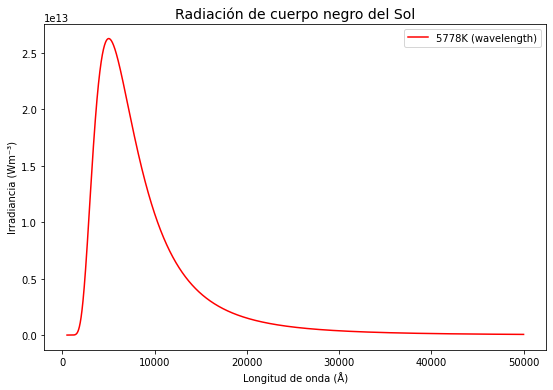

In [6]:
# Gráfico de la ley de radiación de Planck en función de la longitud de onda 
# para el Sol.

pyplot.figure(figsize=(9, 6))
pyplot.title("Radiación de cuerpo negro del Sol", fontsize=14)
pyplot.xlabel("Longitud de onda (Å)")
pyplot.ylabel("Irradiancia (Wm⁻³)")

long_onda = 50000E-10 # m 
incr_long_onda = 10E-10# m
ini_long_onda = 500E-10 # m
valores_long_onda = np.arange(ini_long_onda, long_onda + incr_long_onda, incr_long_onda)

ini_frecuencia = uc.c / ini_long_onda 
frecuencia =  uc.c / long_onda
incr_frecuencia = abs(frecuencia - ini_frecuencia) / 1E3
valores_frecuencia = np.arange(frecuencia, ini_frecuencia + incr_frecuencia, incr_frecuencia)


# Calcula los valores de intensidad recibida en función de z para una elongación fija.
valores_planck_long_onda = [thtools.radiacion_planck(tsp.T_SOL, i) for i in valores_long_onda]
valores_planck_frec = [thtools.radiacion_planck(tsp.T_SOL, i, False) for i in valores_frecuencia]

# Representa los valores de omega.
pyplot.plot([i * 1E10 for i in valores_long_onda], valores_planck_long_onda, linestyle = '-', color = 'r', label = str(tsp.T_SOL) + "K (wavelength)")
#pyplot.plot([uc.c / i for i in valores_frecuencia], valores_planck_frec, linestyle = '-', color = 'b', label = str(tsp.T_SOL) + "K, (frequency)")

pyplot.legend()
pyplot.show()


## **2. Dispersión de Thomson para un único electrón**

###2.1. Obtención de los **coeficientes de van de Hulst**

####Gráfico de los **Coeficientes de van de Hulst**
Representación de los coeficentes de van de Hulst en función de la distancia, d (Rsol) del punto de dispersión, Q, al centro del Sol, S.

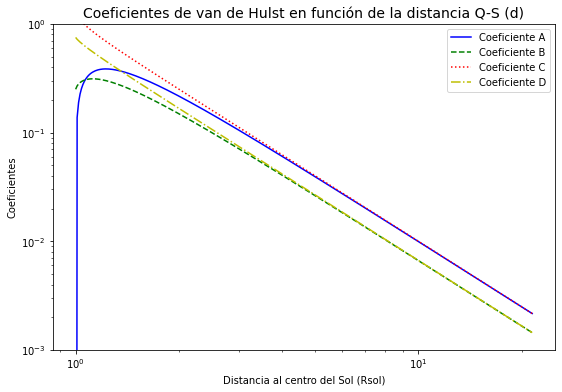

In [7]:
# Gráfico de los coeficientes de van de Hulst en función de la distancia del 
# punto de dispersión, Q, al centro del Sol, S.

pyplot.figure(figsize=(9, 6))
pyplot.title("Coeficientes de van de Hulst en función de la distancia Q-S (d)",fontsize=14)
pyplot.xlabel("Distancia al centro del Sol (Rsol)")
pyplot.ylabel("Coeficientes")

valores_d = np.arange(1, 21.49, 0.01) # RSol
valores_d_meters = [i * units.RSOL_TO_METERS for i in valores_d]
# Cálculo del valor de los coeficientes, d(m), S.I.

pyplot.plot(valores_d, [thtools.vanDeHulst(thgeom.faux_omega_d(d), 'A') for d in valores_d_meters], linestyle='-', color='b', label = "Coeficiente A")
pyplot.plot(valores_d, [thtools.vanDeHulst(thgeom.faux_omega_d(d), 'B') for d in valores_d_meters], linestyle='--', color='g', label = "Coeficiente B")
pyplot.plot(valores_d, [thtools.vanDeHulst(thgeom.faux_omega_d(d), 'C') for d in valores_d_meters], linestyle=':', color='r', label = "Coeficiente C")
pyplot.plot(valores_d, [thtools.vanDeHulst(thgeom.faux_omega_d(d), 'D') for d in valores_d_meters], linestyle='-.', color='y', label = "Coeficiente D")


pyplot.ylim(0.001, 1)
pyplot.xscale("log")
pyplot.yscale("log")

pyplot.legend()
pyplot.show()

### 2.2. Obtención de las **intensidades**

####Gráfico de la **evolución de z con el ángulo CHI** para d y x fijas.

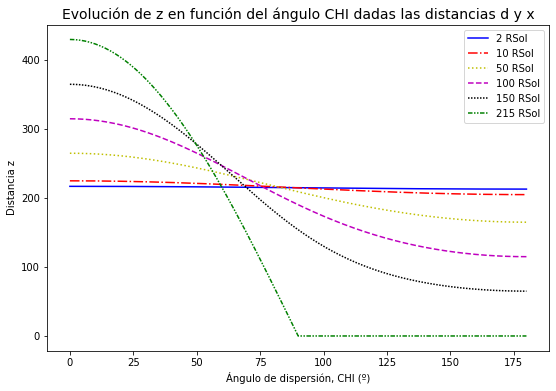

In [8]:
pyplot.figure(figsize=(9, 6))
pyplot.title("Evolución de z en función del ángulo CHI dadas las distancias d y x",fontsize=14)
pyplot.xlabel("Ángulo de dispersión, CHI (º)")
pyplot.ylabel("Distancia z")

valores_chi = [radians(i) for i in range(0, 181)]
valores_chi_grados = range (0, 181)

x = tsp.X * units.METERS_TO_RSOL # Rsol
d = [2, 10, 50, 100, 150, 215] # Rsol

estilos = ['-', '-.', ':', '--', (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1))]
colores = ['b', 'r', 'y', 'm', 'k', 'g']
etiquetas = [str(i) + " RSol" for i in d]

for k in range(len(d)):
  pyplot.plot(valores_chi_grados, [thgeom.faux_z_intensidad(x, d[k], i) for i in valores_chi], 
              linestyle = estilos[k], color = colores[k], label = etiquetas[k])

pyplot.legend()
pyplot.show()

####**Gráficos** de intensidad

#####Gráfico de la **dispersión de Thomson** a **1 UA** del centro del Sol

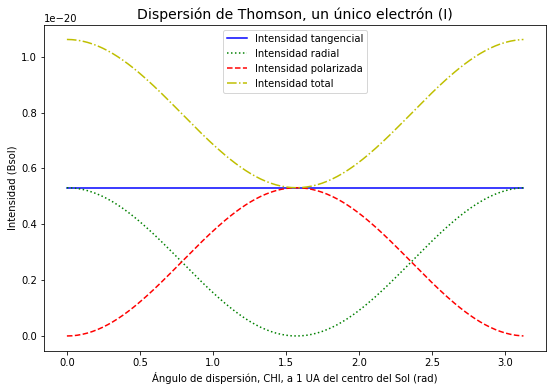

In [9]:
# Gráfico de la dispersión de Thomson a 1 UA del centro del Sol de las 
# intensidades total, tangenicial, radial y polarizada en función del 
# ángulo de dispersión, chi (S-Q-O).

pyplot.figure(figsize=(9, 6))
pyplot.title("Dispersión de Thomson, un único electrón (I)",fontsize=14)
pyplot.xlabel("Ángulo de dispersión, CHI, a 1 UA del centro del Sol (rad)")
pyplot.ylabel("Intensidad (Bsol)")

'''
d = 215 * units.RSOL_TO_METERS # m
x = tsp.X # m
print(d, x)
omega = thgeom.faux_omega_d(d, thtools.RSOL) # rad
valores_chi = [radians(i) for i in range(0, 89)]

pyplot.plot(valores_chi, [thtools.It(I0, tsp.SIGMA_E, thgeom.faux_z_intensidad(x, d, i), omega, U) for i in valores_chi], linestyle='-', color='b', label = "Intensidad tangencial")
pyplot.plot(valores_chi, [thtools.Ir(I0, tsp.SIGMA_E, thgeom.faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle=':', color='g', label = "Intensidad radial")
pyplot.plot(valores_chi, [thtools.Ip(I0, tsp.SIGMA_E, thgeom.faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle='--', color='r', label = "Intensidad polarizada")
pyplot.plot(valores_chi, [thtools.Itotal(I0, tsp.SIGMA_E, thgeom.faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle='-.', color='y', label = "Intensidad total")
'''

d = 215 * units.RSOL_TO_METERS # m
omega = thgeom.faux_omega_d(d) # rad
valores_chi = [radians(i) for i in range(0, 180)]

pyplot.plot(valores_chi, [thtools.It(I0, tsp.SIGMA_E, 1, omega, U) for i in valores_chi], linestyle='-', color='b', label = "Intensidad tangencial")
pyplot.plot(valores_chi, [thtools.Ir(I0, tsp.SIGMA_E, 1, omega, i, U) for i in valores_chi], linestyle=':', color='g', label = "Intensidad radial")
pyplot.plot(valores_chi, [thtools.Ip(I0, tsp.SIGMA_E, 1, omega, i, U) for i in valores_chi], linestyle='--', color='r', label = "Intensidad polarizada")
pyplot.plot(valores_chi, [thtools.Itotal(I0, tsp.SIGMA_E, 1, omega, i, U) for i in valores_chi], linestyle='-.', color='y', label = "Intensidad total")


pyplot.legend()
pyplot.show()


#####Gráfico de la **dispersión de Thomson** a **2 Rsol** del centro del Sol

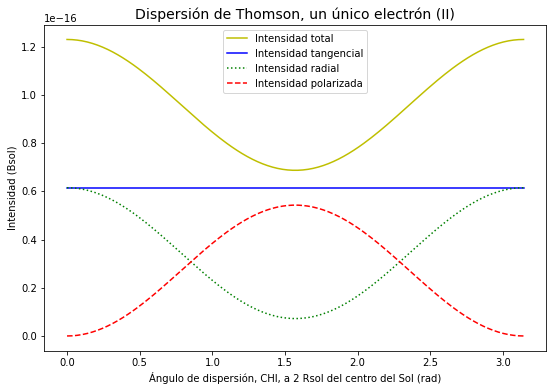

In [10]:
# Gráfico de la dispersión de Thomson a 2 Rsol del centro del Sol de las 
# intensidades total, tangenicial, radial y polarizada en función del 
# ángulo de dispersión, CHI.

pyplot.figure(figsize=(9, 6))
pyplot.title("Dispersión de Thomson, un único electrón (II)",fontsize=14)
pyplot.xlabel("Ángulo de dispersión, CHI, a 2 Rsol del centro del Sol (rad)")
pyplot.ylabel("Intensidad (Bsol)")

x = 1 * units.AU_TO_METERS # m
d = 2 * units.RSOL_TO_METERS # m
omega = thgeom.faux_omega_d(d) # rad
valores_chi = [radians(i) for i in range(0, 181)]

'''
pyplot.plot(valores_chi, [thtools.Itotal(I0, SIGMAe, thtools.faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle='-', color='y', label = "Intensidad total")
pyplot.plot(valores_chi, [thtools.It(I0, SIGMAe, thtools.faux_z_intensidad(x, d, i), omega, U) for i in valores_chi], linestyle='-', color='b', label = "Intensidad tangencial")
pyplot.plot(valores_chi, [thtools.Ir(I0, SIGMAe, thtools.faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle=':', color='g', label = "Intensidad radial")
pyplot.plot(valores_chi, [thtools.Ip(I0, SIGMAe, thtools.faux_z_intensidad(x, d, i), omega, i, U) for i in valores_chi], linestyle='--', color='r', label = "Intensidad polarizada")
'''

pyplot.plot(valores_chi, [thtools.Itotal(I0, tsp.SIGMA_E, 1, omega, i, U) for i in valores_chi], linestyle='-', color='y', label = "Intensidad total")
pyplot.plot(valores_chi, [thtools.It(I0, tsp.SIGMA_E, 1, omega, U) for i in valores_chi], linestyle='-', color='b', label = "Intensidad tangencial")
pyplot.plot(valores_chi, [thtools.Ir(I0, tsp.SIGMA_E, 1, omega, i, U) for i in valores_chi], linestyle=':', color='g', label = "Intensidad radial")
pyplot.plot(valores_chi, [thtools.Ip(I0, tsp.SIGMA_E, 1, omega, i, U) for i in valores_chi], linestyle='--', color='r', label = "Intensidad polarizada")


pyplot.legend()
pyplot.show()


## **3. Dispersión de Thomson a través de la línea de visión del observador**

###3.1. Estudio de la evolución de los parámetros necesarios para el cálculo de la dispersión de Thomson

Se definen cuatro listas:


1. ```epsilons```: contiene las distintas elongaciones para las cuales se va a observar la evolución de los parámetros en estudio (d, z, phi, etc.).
2. ```estilos```: contiene los diferentes formatos para las líneas de los gráficos para cada una de las elongaciones.
3. ```colores```: contiene los diferentes colores para las líneas de los gráficos para cada una de las elongaciones.
4. ```etiquetas```: contiene las diferentes etiquetas de las leyendas de los gráficos para cada una de las elongaciones.

La primera hace referencia a los experimentos a realizar sobre los parámetros necesarios para el cálculo de la dispersión de Thomson y la segunda, al formato de los gráficos en os que se representa esa experimentación.



In [11]:
# Valores en radianes para las distintas elongaciones a experimentar.
epsilons = [  radians(5),     radians(20),      radians(30),        radians(45),        radians(60),        radians(90),      radians(135)] 

# Configuración para la visualización de los gráficos: estilos y colores de 
# líneas y etiquetas para la leyenda.
estilos = [       ':',              '-',              '--',              '-.',          (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1)), (0, (5, 10))]
colores = [       'm',              'b',              'g',               'r',            'orange',         'brown',            'y']
etiquetas = ['Elongación 5º', "Elongación 20º", "Elongación 30º", "Elongación 45º", "Elongación 60º", "Elongación 90º", "Elongación 135º"]

####Gráfico de la **evolución de z en función del ángulo phi** (O-S-Q)

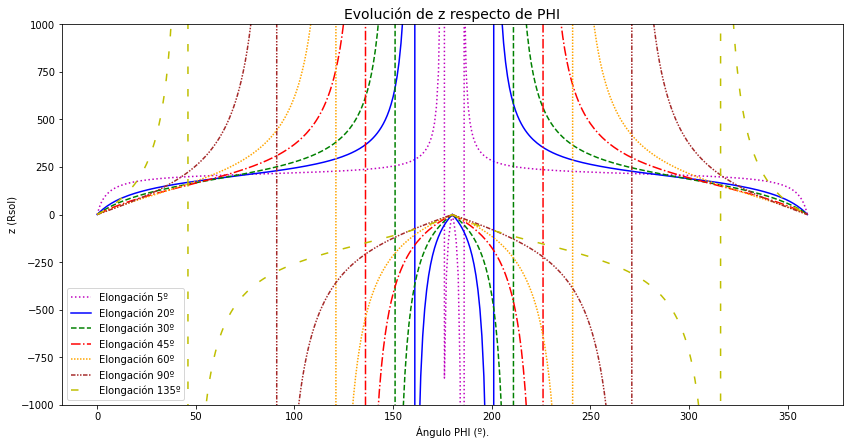

In [12]:
# Gráfico de la evolución de la distancia del observador al punto de dispersión,
# z (Rsol), al punto de dispersión, Q, en función del ángulo phi, O-S-Q.

pyplot.figure(figsize=(14, 7))
pyplot.title("Evolución de z respecto de PHI", fontsize=14)
pyplot.xlabel("Ángulo PHI (º).")
pyplot.ylabel("z (Rsol)")

PHI_360 = radians(360)
PHI_180 = radians(180)
incrPHI = radians(1)
valores_PHI_180 = np.arange(0, PHI_180 + incrPHI, incrPHI)
valores_PHI_360 = np.arange(PHI_180, PHI_360 + incrPHI, incrPHI)

x = tsp.X * units.METERS_TO_RSOL # RSol

# Calcula los valores de la de intensidad recibida en función de z para una 
# elongación fija, epsilon.
for j in range(0, len(epsilons)):
    valores_z_180 = [thgeom.faux_z(x, epsilons[j], i) for i in valores_PHI_180]
    valores_z_360 = [thgeom.faux_z(x, epsilons[j], radians(360) - i) for i in valores_PHI_360]
    # Representa los valores de z (Rsol).
    pyplot.plot([degrees(i) for i in valores_PHI_180], valores_z_180, linestyle = estilos[j], color = colores[j], label = etiquetas[j])
    pyplot.plot([degrees(i) for i in valores_PHI_360], valores_z_360, linestyle = estilos[j], color = colores[j])

pyplot.ylim(-1000, 1000)

pyplot.legend()
pyplot.show()

####Gráfico de la **evolución de omega (T-Q-S) en función de la distancia z**

Para la elongación EPSILON = 5.0 º OMEGA tiene máximo en x = 214.18 Rsol donde OMEGA = 3.06 º
Para la elongación EPSILON = 20.0 º OMEGA tiene máximo en x = 202.03 Rsol donde OMEGA = 0.78 º
Para la elongación EPSILON = 30.0 º OMEGA tiene máximo en x = 186.2 Rsol donde OMEGA = 0.53 º
Para la elongación EPSILON = 45.0 º OMEGA tiene máximo en x = 152.03 Rsol donde OMEGA = 0.38 º
Para la elongación EPSILON = 60.0 º OMEGA tiene máximo en x = 107.5 Rsol donde OMEGA = 0.31 º
Para la elongación EPSILON = 90.0 º OMEGA tiene máximo en x = 0.0 Rsol donde OMEGA = 0.27 º
Para la elongación EPSILON = 135.0 º OMEGA tiene máximo en x = 0.0 Rsol donde OMEGA = 0.27 º


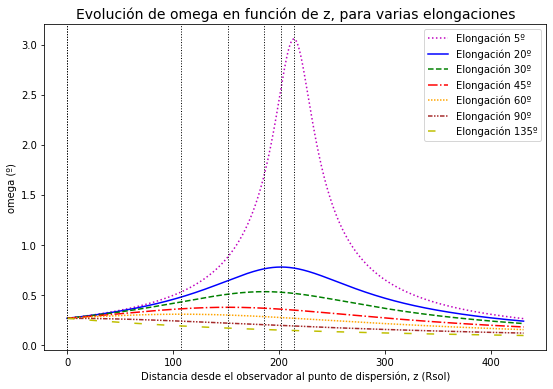

In [13]:
# Gráfico de la evolución de omega, dado una elongación fija, epsilon, en 
# función de la distancia del observador al punto de dispersión, z (Rsol).

pyplot.figure(figsize=(9, 6))
pyplot.title("Evolución de omega en función de z, para varias elongaciones",fontsize=14)
pyplot.xlabel("Distancia desde el observador al punto de dispersión, z (Rsol)")
pyplot.ylabel("omega (º)")

valores_z = np.arange(0, 431, 0.01) # RSol
valores_z_meters = [i * units.RSOL_TO_METERS for i in valores_z] # m
x = tsp.X # m

for j in range(0, len(epsilons)):
    # Calcula los valores de omega en función de z para una elongación fija.
    valores_omega = [thgeom.faux_omega(x, i, epsilons[j]) for i in valores_z_meters]

    # Calcula el máximo y su coordenada x.
    maxOmega = max(valores_omega)
    zmax = valores_z[valores_omega.index(maxOmega)]

    # Representa los valores de omega.
    pyplot.plot(valores_z, [degrees(i) for i in valores_omega], linestyle = estilos[j], color = colores[j], label = etiquetas[j])

    # Representa el máximo de los valores de omega representados.
    pyplot.axvline(zmax, ymin = 0, ymax = 1, linewidth = 1, linestyle = ':', color = 'k')
    print("Para la elongación EPSILON =", round(degrees(epsilons[j]), 2),
        "º OMEGA tiene máximo en x =", round(zmax, 2), 
        "Rsol donde OMEGA =", round(degrees(maxOmega), 2), "º")

pyplot.legend()
pyplot.show()

####Gráfico de la **evolución de la distancia d en función de la distancia z**

Para la elongación EPSILON = 5.0 º d tiene mínimo en x = 214.18 Rsol donde d = 1073.64 Rsol
Para la elongación EPSILON = 20.0 º d tiene mínimo en x = 202.03 Rsol donde d = 4213.21 Rsol
Para la elongación EPSILON = 30.0 º d tiene mínimo en x = 186.2 Rsol donde d = 6159.3 Rsol
Para la elongación EPSILON = 45.0 º d tiene mínimo en x = 152.03 Rsol donde d = 8710.56 Rsol
Para la elongación EPSILON = 60.0 º d tiene mínimo en x = 107.5 Rsol donde d = 10668.21 Rsol
Para la elongación EPSILON = 90.0 º d tiene mínimo en x = 1.0 Rsol donde d = 12318.73 Rsol
Para la elongación EPSILON = 135.0 º d tiene mínimo en x = 1.0 Rsol donde d = 12359.17 Rsol


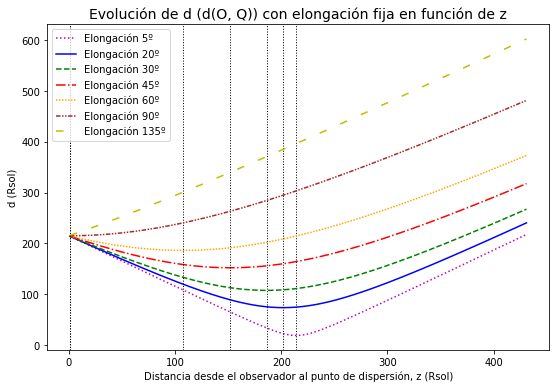

In [14]:
# Gráfico de la evolución de d (distancia desde el punto de dispersión, Q, al 
# Sol), dado un EPSILON fijo, en función de la distancia del observador al punto
# de dispersión.

pyplot.figure(figsize=(9, 6))
pyplot.title("Evolución de d (d(O, Q)) con elongación fija en función de z",fontsize=14)
pyplot.xlabel("Distancia desde el observador al punto de dispersión, z (Rsol)")
pyplot.ylabel("d (Rsol)")

valores_z = np.arange(1, 431, 0.01)
x = tsp.X * units.METERS_TO_RSOL #RSol

for j in range(0, len(epsilons)):
    # Calcula los valores de omega en función de z para una elongación fija.
    valores_d = [thgeom.faux_d(x, i, epsilons[j]) for i in valores_z]
    # Calcula el máximo y su coordenada x.
    minD = min(valores_d)
    zmin = valores_z[valores_d.index(minD)]
    # Representa los valores de omega.
    pyplot.plot(valores_z, valores_d, linestyle = estilos[j], color = colores[j], label = etiquetas[j])
    # Representa el máximo de los valores de omega representados.
    pyplot.axvline(zmin, ymin = 0, ymax = 1, linewidth = 1, linestyle = ':', color = 'k')
    print("Para la elongación EPSILON =", round(degrees(epsilons[j]), 2), "º d tiene mínimo en x =", round(zmin, 2), "Rsol donde d =", round(degrees(minD), 2), "Rsol")

pyplot.legend()
pyplot.show()

### **3.2. Integración numérica**

####Funciones **necesarias para la integración** en la línea de visión

#####**Expresiones de la dispersión**
Simplificadas para la integración numérica.

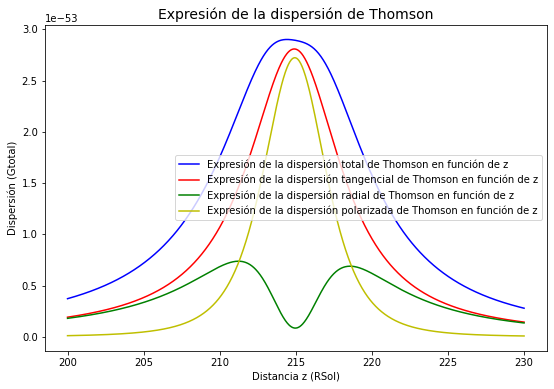

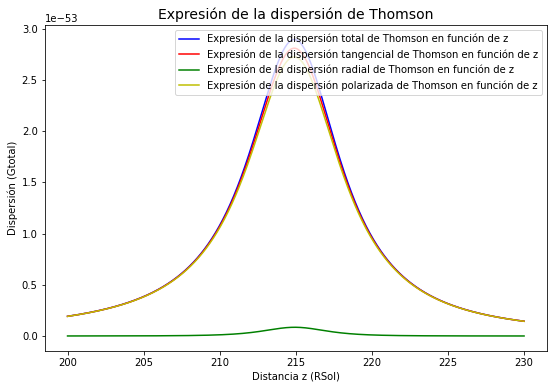

In [25]:
# Gráfico de expresión de la dispersión de Thomson (Gtotal).

x = 215 * units.RSOL_TO_METERS # m
z = 230 * units.RSOL_TO_METERS # m
ini_z = 200 * units.RSOL_TO_METERS # m
incr_z = abs(z - ini_z) / 1000 # m 
epsilon = radians(1)
valores_z = np.arange(ini_z, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Expresión de la dispersión de Thomson", fontsize=14)
pyplot.xlabel("Distancia z (RSol)")
pyplot.ylabel("Dispersión (Gtotal)")

valores_dispersion_total = [thtools.Gtotal(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_tangencial = [thtools.Gt(thgeom.faux_omega(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_radial = [thtools.Gr(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_polarizada = [thtools.Gp(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in valores_z]
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_total, linestyle = '-', color ='b', label = 'Expresión de la dispersión total de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_tangencial, linestyle = '-', color ='r', label = 'Expresión de la dispersión tangencial de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_radial, linestyle = '-', color ='g', label = 'Expresión de la dispersión radial de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_polarizada, linestyle = '-', color ='y', label = 'Expresión de la dispersión polarizada de Thomson en función de z')

#pyplot.xscale("log")
#pyplot.yscale("log")

pyplot.legend()
pyplot.show()

# Gráfico de expresión de la dispersión de Thomson (Gtotal).

x = 215 * units.RSOL_TO_METERS # m
z = 230 * units.RSOL_TO_METERS # m
ini_z = 200 * units.RSOL_TO_METERS # m
incr_z = abs(z - ini_z) / 1000 # m 
epsilon = radians(1)
valores_z = np.arange(ini_z, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Expresión de la dispersión de Thomson", fontsize=14)
pyplot.xlabel("Distancia z (RSol)")
pyplot.ylabel("Dispersión (Gtotal)")

valores_dispersion_total = [thtools.Gtotal(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in valores_z]
valores_dispersion_tangencial = [thtools.Gt(thgeom.faux_omega(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_radial = [thtools.Gr(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in valores_z]
valores_dispersion_polarizada = [thtools.Gp(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in valores_z]
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_total, linestyle = '-', color ='b', label = 'Expresión de la dispersión total de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_tangencial, linestyle = '-', color ='r', label = 'Expresión de la dispersión tangencial de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_radial, linestyle = '-', color ='g', label = 'Expresión de la dispersión radial de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_polarizada, linestyle = '-', color ='y', label = 'Expresión de la dispersión polarizada de Thomson en función de z')

#pyplot.xscale("log")
#pyplot.yscale("log")

pyplot.legend()
pyplot.show()

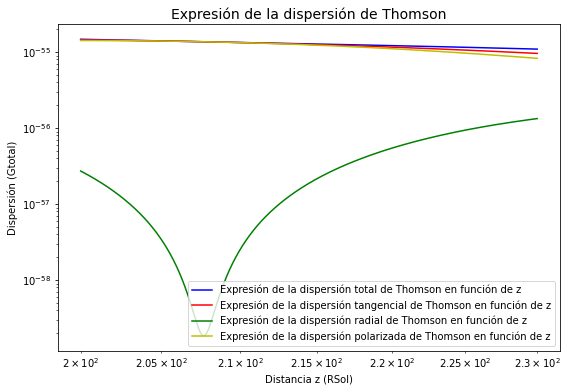

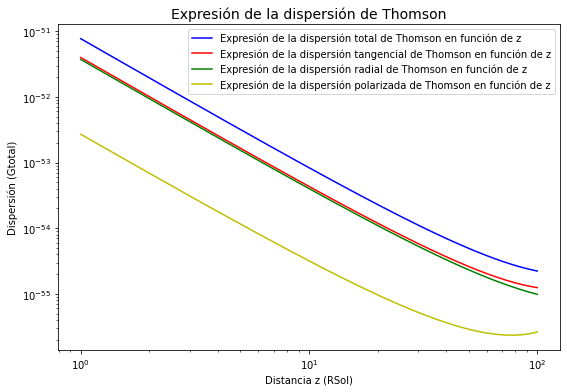

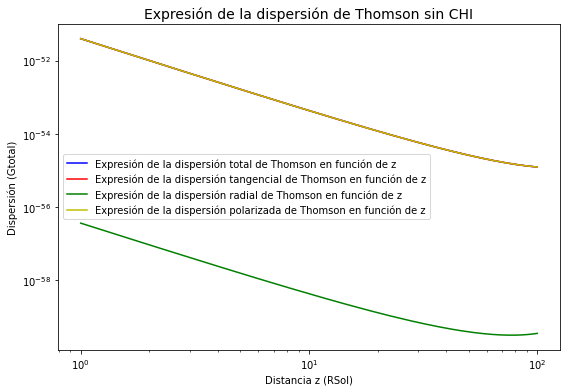

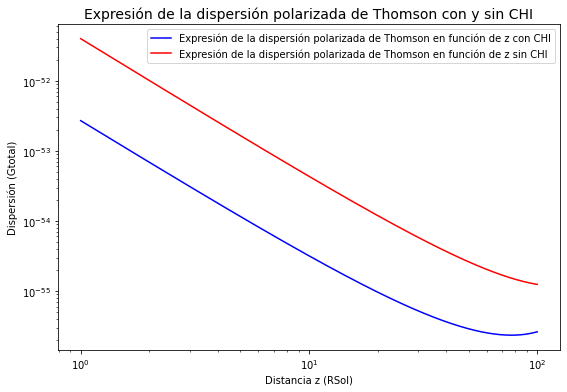

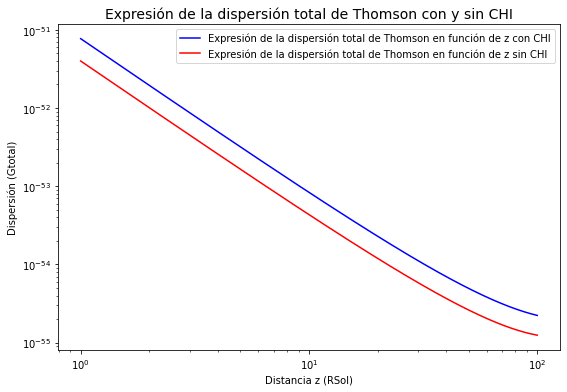

In [22]:





########################################
# Gráfico de expresión de la dispersión de Thomson (Gtotal).

x = 215 * units.RSOL_TO_METERS # m
z = 100 * units.RSOL_TO_METERS # m
ini_z = 1 * units.RSOL_TO_METERS # m
incr_z = abs(z - ini_z) / 1000 # m 
epsilon = radians(15)
valores_z = np.arange(ini_z, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Expresión de la dispersión de Thomson", fontsize=14)
pyplot.xlabel("Distancia z (RSol)")
pyplot.ylabel("Dispersión (Gtotal)")

valores_dispersion_total = [thtools.Gtotal(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_tangencial = [thtools.Gt(thgeom.faux_omega(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_radial = [thtools.Gr(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_polarizada = [thtools.Gp(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in valores_z]
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_total, linestyle = '-', color ='b', label = 'Expresión de la dispersión total de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_tangencial, linestyle = '-', color ='r', label = 'Expresión de la dispersión tangencial de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_radial, linestyle = '-', color ='g', label = 'Expresión de la dispersión radial de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_polarizada, linestyle = '-', color ='y', label = 'Expresión de la dispersión polarizada de Thomson en función de z')

pyplot.xscale("log")
pyplot.yscale("log")

pyplot.legend()
pyplot.show()

# Gráfico de expresión de la dispersión de Thomson (Gtotal) sin CHI.

x = 215 * units.RSOL_TO_METERS # m
z = 100 * units.RSOL_TO_METERS # m
ini_z = 1 * units.RSOL_TO_METERS # m
incr_z = abs(z - ini_z) / 1000 # m 
epsilon = radians(15)
valores_z = np.arange(ini_z, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Expresión de la dispersión de Thomson sin CHI", fontsize=14)
pyplot.xlabel("Distancia z (RSol)")
pyplot.ylabel("Dispersión (Gtotal)")

valores_dispersion_total = [thtools.Gtotal(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in valores_z]
valores_dispersion_tangencial = [thtools.Gt(thgeom.faux_omega(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_radial = [thtools.Gr(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in valores_z]
valores_dispersion_polarizada = [thtools.Gp(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in valores_z]
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_total, linestyle = '-', color ='b', label = 'Expresión de la dispersión total de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_tangencial, linestyle = '-', color ='r', label = 'Expresión de la dispersión tangencial de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_radial, linestyle = '-', color ='g', label = 'Expresión de la dispersión radial de Thomson en función de z')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_polarizada, linestyle = '-', color ='y', label = 'Expresión de la dispersión polarizada de Thomson en función de z')

pyplot.xscale("log")
pyplot.yscale("log")

pyplot.legend()
pyplot.show()


# Gráfico de expresión de la dispersión de Thomson (Gpolarizada) con y sin CHI.

x = 215 * units.RSOL_TO_METERS # m
z = 100 * units.RSOL_TO_METERS # m
ini_z = 1 * units.RSOL_TO_METERS # m
incr_z = abs(z - ini_z) / 1000 # m 
epsilon = radians(15)
valores_z = np.arange(ini_z, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Expresión de la dispersión polarizada de Thomson con y sin CHI", fontsize=14)
pyplot.xlabel("Distancia z (RSol)")
pyplot.ylabel("Dispersión (Gtotal)")

valores_dispersion_p_chi = [thtools.Gp(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_p = [thtools.Gp(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in valores_z]
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_p_chi, linestyle = '-', color ='b', label = 'Expresión de la dispersión polarizada de Thomson en función de z con CHI')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_p, linestyle = '-', color ='r', label = 'Expresión de la dispersión polarizada de Thomson en función de z sin CHI')

pyplot.xscale("log")
pyplot.yscale("log")

pyplot.legend()
pyplot.show()

# Gráfico de expresión de la dispersión de Thomson (Gtotal) con y sin CHI.

x = 215 * units.RSOL_TO_METERS # m
z = 100 * units.RSOL_TO_METERS # m
ini_z = 1 * units.RSOL_TO_METERS # m
incr_z = abs(z - ini_z) / 1000 # m 
epsilon = radians(15)
valores_z = np.arange(ini_z, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Expresión de la dispersión total de Thomson con y sin CHI", fontsize=14)
pyplot.xlabel("Distancia z (RSol)")
pyplot.ylabel("Dispersión (Gtotal)")

valores_dispersion_total_chi = [thtools.Gtotal(thgeom.faux_omega(x, i, epsilon), thgeom.faux_chi(x, i, epsilon), U, i) for i in valores_z]
valores_dispersion_total = [thtools.Gtotal(thgeom.faux_omega(x, i, epsilon), np.pi/2, U, i) for i in valores_z]
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_total_chi, linestyle = '-', color ='b', label = 'Expresión de la dispersión total de Thomson en función de z con CHI')
pyplot.plot([i * units.METERS_TO_RSOL for i in valores_z], valores_dispersion_total, linestyle = '-', color ='r', label = 'Expresión de la dispersión total de Thomson en función de z sin CHI')

pyplot.xscale("log")
pyplot.yscale("log")

pyplot.legend()
pyplot.show()

#####Modelo de la densidad electrónica

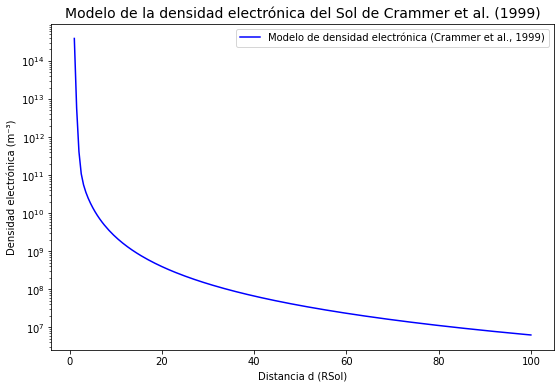

In [16]:
# Gráfico del modelo de Crammer et al. (1999) para la densidad electrónica del
# Sol en función de la distancia d (S-Q).

x = 215 # RSol
d = 100 # RSol
incr_d = 0.5 # RSol 
valores_d = np.arange(1, d + incr_d, incr_d)

pyplot.figure(figsize=(9, 6))
pyplot.title("Modelo de la densidad electrónica del Sol de Crammer et al. (1999)", fontsize=14)
pyplot.xlabel("Distancia d (RSol)")
pyplot.ylabel("Densidad electrónica (m⁻³)")

valores_Ne = [ne.crammer_model(i) for i in valores_d]
pyplot.plot(valores_d, valores_Ne, linestyle = '-', color ='b', label = 'Modelo de densidad electrónica (Crammer et al., 1999)')

pyplot.yscale("log")

pyplot.legend()
pyplot.show()


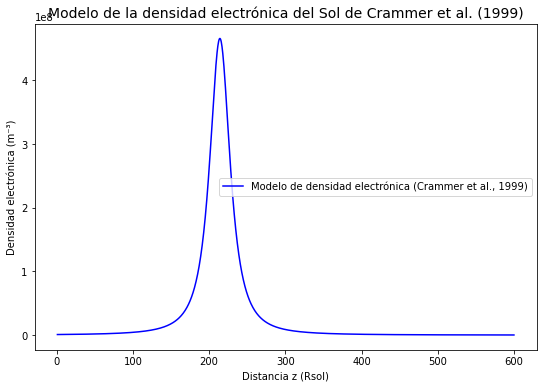

In [17]:
# Gráfico del modelo de Crammer et al. (1999) para la densidad electrónica del
# Sol en función de la distancia z (O-Q).

x = 215 # Rsol
z = 600 # Rsol
incr_z = 0.5 # Rsol
valores_z = np.arange(1, z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Modelo de la densidad electrónica del Sol de Crammer et al. (1999)", fontsize=14)
pyplot.xlabel("Distancia z (Rsol)")
pyplot.ylabel("Densidad electrónica (m⁻³)")

valores_Ne = [ne.crammer_model(thgeom.faux_d(x, i, radians(5))) for i in valores_z]
pyplot.plot(valores_z, valores_Ne, linestyle = '-', color ='b', label = 'Modelo de densidad electrónica (Crammer et al., 1999)')

pyplot.legend()
pyplot.show()

#####**Funciones de integración numérica**
Respecto de z, en Rsol, y respecto del ángulo phi (O-S-Q).

####Gráficos de integración numérica

#####Gráfico de la **integración numérica** de la línea de visión sobre la **distancia z** (O-Q)

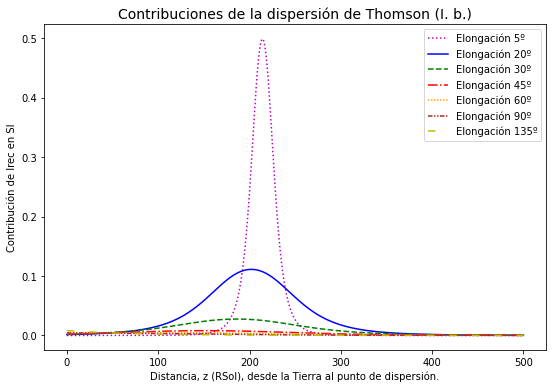

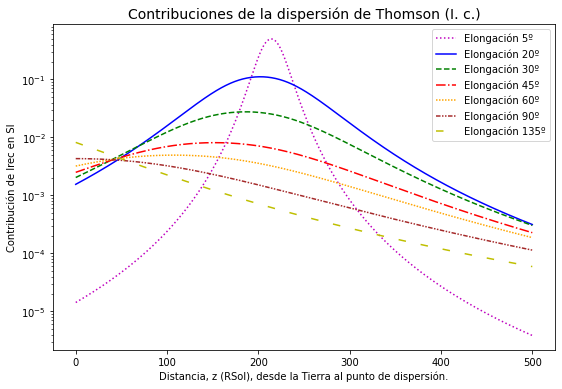

In [18]:
# Gráfico integración numérica de Irec a 2 UA (430 RSol) de distancia, z, 
# desde el observador, O, al punto de dispersión, Q.

## Gráfico sin escala logarítmica (en radios solares).
"""
x = tsp.X * units.METERS_TO_RSOL # Rsol
ini_z = 0 # Rsol
fin_z = 500 # Rsol
incr_z = 0.5 # Rsol 
valores_z = np.arange(ini_z, fin_z + incr_z, incr_z)

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (I. a.)", fontsize=14)
pyplot.xlabel("Distancia, z (Rsol), desde la Tierra al punto de dispersión.")
pyplot.ylabel("Contribución de Irec")

for j in range(0, len(epsilons)):
    # Calcula los valores de intensidad recibida en función de z para una elongación fija.
    valorIrec =  thtools.Irec_z(x, epsilons[j], ini_z, fin_z, incr_z, U, 1)
    valores_f_Irec = [thtools.f_Irec_z(x, epsilons[j], i, U, 1) / valorIrec for i in valores_z]
    # Representa los valores de las contribuciones.
    pyplot.plot(valores_z, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

pyplot.legend()
pyplot.show()
"""

## Gráficos en unidades SI:

x = tsp.X # m
ini_z = 0 * units.RSOL_TO_METERS # m
fin_z = 500 * units.RSOL_TO_METERS # m
incr_z = 0.5 * units.RSOL_TO_METERS # m 
valores_z = np.arange(ini_z, fin_z + incr_z, incr_z)

### Gráfico sin escala logarítmica (en metros).

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (I. b.)", fontsize=14)
pyplot.xlabel("Distancia, z (RSol), desde la Tierra al punto de dispersión.")
pyplot.ylabel("Contribución de Irec en SI")

for j in range(0, len(epsilons)):
    # Calcula los valores de intensidad recibida en función de z para una elongación fija.
    valorIrec =  thtools.Irec_z(x, epsilons[j], ini_z, fin_z, incr_z, U)
    valores_f_Irec = [thtools.f_Irec_z(x, epsilons[j], i, U) / valorIrec for i in valores_z]
    # Representa los valores de las contribuciones.
    pyplot.plot(valores_z * units.METERS_TO_RSOL, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

pyplot.legend()
pyplot.show()

### Gráfico con escala logarítmica (en metros)

pyplot.figure(figsize=(9, 6))
pyplot.title("Contribuciones de la dispersión de Thomson (I. c.)", fontsize=14)
pyplot.xlabel("Distancia, z (RSol), desde la Tierra al punto de dispersión.")
pyplot.ylabel("Contribución de Irec en SI")

for j in range(0, len(epsilons)):
    # Calcula los valores de intensidad recibida en función de z para una elongación fija.
    valorIrec =  thtools.Irec_z(x, epsilons[j], ini_z, fin_z, incr_z, U)
    valores_f_Irec = [thtools.f_Irec_z(x, epsilons[j], i, U) / valorIrec for i in valores_z]
    # Representa los valores de las contribuciones.
    pyplot.plot(valores_z * units.METERS_TO_RSOL, valores_f_Irec, linestyle = estilos[j], color = colores[j], label = etiquetas[j])

pyplot.yscale("log")

pyplot.legend()
pyplot.show()

## **4. Modelo del espectro de la K-corona**

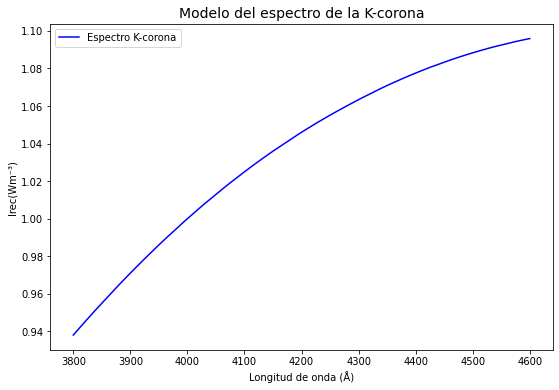

In [19]:
# Gráfico integración numérica de Irec a 2 UA (430 RSol) de distancia, z, 
# desde el observador, O, al punto de dispersión, Q.

pyplot.figure(figsize=(9, 6))
pyplot.title("Modelo del espectro de la K-corona", fontsize=14)
pyplot.xlabel("Longitud de onda (Å)")
pyplot.ylabel("Irec(Wm⁻³)")

x = 215 * units.RSOL_TO_METERS # m
long_onda = 4600E-10 # m
ini_long_onda = 3800E-10 # m
num_puntos = 5000
ini_z = 210 * units.RSOL_TO_METERS # m
fin_z = 220 * units.RSOL_TO_METERS # m 
incr_z = 0.1 * units.RSOL_TO_METERS # m
epsilon = tsp.EPSILON # rad

wavelength_values = np.linspace(ini_long_onda, long_onda, num_puntos)
scattered_light_values = []

onda_4000 = thtools.get_scattered_light(4000E-10, tsp.T_SOL, x, epsilon, ini_z, fin_z, incr_z)

# Calcula los valores de intensidad recibida en función de la longitud de onda para una elongación fija.
for i in wavelength_values:
    scattered_light = thtools.get_scattered_light(i, tsp.T_SOL, x, epsilon, ini_z, fin_z, incr_z)
    scattered_light_norm = scattered_light / onda_4000
    scattered_light_values.append(scattered_light_norm)

# Representa los valores de omega.
pyplot.plot([i * 1E10 for i in wavelength_values], scattered_light_values, linestyle = '-', color = 'b', label = 'Espectro K-corona')

pyplot.legend()
pyplot.show()

In [20]:
U = thtools.coef_limb_darkening(4000E-10)
print(thtools.radiacion_planck(tsp.T_SOL, 4000E-10))
print(thtools.Irec_z(x, epsilon, ini_z, fin_z, incr_z, U))
print(thtools.get_scattered_light(4000E-10, tsp.T_SOL, x, epsilon, ini_z, fin_z, incr_z))


22927270278457.13
4.521053026129007e-26
1.0365540467329625e-12


In [21]:
thtools.print_params_state(thtools.RSOL, tsp.SIGMA_E, tsp.WAVELENGTH, tsp.T_SOL, I0, U, tsp.X * units.METERS_TO_RSOL, tsp.EPSILON)

RSOL = 696340000 m
SIGMAe = 7.95e-30 m²sr⁻¹
ONDA = 5e-07 m
T = 5778 K
I0 = 26258628800736.918
U = 0.8718103636799954
X = 215.0 RSOL
EPSILON = 0.17453292519943295 rad
